In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import re
import os

In [3]:
import glob

### Lessons learned
* Make notes on classic EDA stuff
 * grouping and aggregating
 * summary statistics
 * basic plots
 * correlations
* os basics
* regexp basics

# Cell data processing

- []Circumradius different length
- [x]Files not saved
- []Negative theta - just anomalous results + biasedness?
- [x]Nonsense results in estimation sometimes
- []Estimates are not centered at the estimated value
- []Edge length multimodality

In [313]:
dirname = 'files/Bitofboth/'
filenames = glob.glob(dirname + 'cell_data*')

data = pd.DataFrame(columns=pd.read_csv(filenames[0], sep = ';').columns)

for filename in filenames:
    newdata = pd.read_csv(filename, sep=';')
    # print(newdata)
    data = data.append(newdata)

data['type'] = 'D+'
# cdata = cdata.reset_index()

In [374]:
dirname = 'files/LaguerreHardcoreNew/'
filenames = glob.glob(dirname + 'cell_data*')

data = pd.DataFrame(columns=pd.read_csv(filenames[0], sep = ';').columns)

for filename in filenames:
    newdata = pd.read_csv(filename, sep=';')
    # print(newdata)
    data = data.append(newdata)

data['type'] = 'L+'
# cdata = cdata.reset_index()

In [383]:
dirname = 'files/DelaunayHardcoreWindow1/'
filenames = glob.glob(dirname + 'cell_data*')

data = pd.DataFrame(columns=pd.read_csv(filenames[0], sep = ';').columns)

for filename in filenames:
    newdata = pd.read_csv(filename, sep=';')
    # print(newdata)
    data = data.append(newdata)

data['type']='D+'
# data = data.append(cdata)
# cdata = cdata.reset_index()

In [384]:
dirname = 'files/LaguerreHardcoreWindow1/'
filenames = glob.glob(dirname + 'cell_data*')

cdata = pd.DataFrame(columns=pd.read_csv(filenames[0], sep = ';').columns)

for filename in filenames:
    newdata = pd.read_csv(filename, sep=';')
    # print(newdata)
    cdata = cdata.append(newdata)

cdata['type'] = 'L+'
data = data.append(cdata)
# cdata = cdata.reset_index()

In [385]:
cdata = data.reset_index()

In [386]:
# Convert to numeric
cdata['cells'] = pd.to_numeric(cdata['cells'])
cdata['vertices'] = pd.to_numeric(cdata['vertices'])
cdata['removable'] = pd.to_numeric(cdata['removable'])

In [387]:
cdata.loc[:,'theta_est'] = pd.to_numeric(cdata.loc[:,'theta_est'])
cdata.loc[:,'z_est'] = pd.to_numeric(cdata.loc[:,'z_est'])

In [388]:
cdata.groupby(['z','type','theta']).size()

z      type  theta
500.0  D+    -1.0     100
             -0.5     100
              0.5     100
              1.0     100
       L+    -1.0     100
             -0.5     100
              0.5     100
              1.0     100
dtype: int64

In [389]:
def listify(string):
        strlist = string[1:-2].replace(' ','').split(',')[:-1]
        result = [float(num) for num in strlist]
        return(result)

#### Filter anomalous results - were any?

In [390]:
cdataf = cdata.loc[np.abs(cdata['theta_est']) < 1000]
len(cdataf) / len(cdata) # non-anomalous / all

1.0

### Estimation summary

In [392]:
## Only positive thetas
cdataf = cdataf[cdataf.theta > 0 ]

In [397]:
estimates = cdataf.groupby(['type','theta'])['alpha_est','theta_est','theta_known_z_est', 'z_est', 'z_known_theta_est','vertices','removable'].agg(['count', 'mean','std'])
estimates

alpha_est                     theta_est                      \
               count      mean       std     count      mean       std   
type theta                                                               
D+   0.5         100  0.149329  0.000687       100  1.166429  0.947769   
     1.0         100  0.149461  0.000503       100  1.849576  1.036635   
L+   0.5         100  0.154550  0.022354       100  1.205965  1.447521   
     1.0         100  0.155801  0.045056       100  1.719391  1.414968   

           theta_known_z_est                     z_est    ...                 \
                       count      mean       std count    ...            std   
type theta                                                ...                  
D+   0.5                 100  0.228312  0.563860   100    ...      52.151705   
     1.0                 100  0.831618  0.624940   100    ...      58.291232   
L+   0.5                 100  4.063474  0.846921   100    ...      41.404738   
     1.0                 100  4.497460  0.763197   100    ...      46.785214   

           z_known_theta_est                       vertices          \
                       count       mean        std    count    mean   
type theta                                                            
D+   0.5                 100  564.27343  23.556744      100  595.24   
     1.0                 100  564.66566  25.835481      100  577.32   
L+   0.5                 100  285.50261  16.006631      100  460.83   
     1.0                 100  290.65149  18.697643      100  451.88   

                      removable                     
                  std     count    mean        std  
type theta                                          
D+   0.5    18.976924       100  538.37  23.175507  
     1.0    19.278333       100  515.81  24.939804  
L+   0.5    16.132065       100  269.36  15.710461  
     1.0    16.312776       100  261.60  17.602227  

[4 rows x 21 columns]

### LaTeX table prep

In [402]:
print(r"""\begin{table*}\centering
\ra{1.3}
\begin{tabular}{lrlllllll}\toprule
&& \multicolumn{1}{c}{$\hat\alpha$}& \multicolumn{2}{c}{$\hat\theta$} & \multicolumn{2}{c}{$\hat z$} & \multicolumn{2}{c}{Vertices} \\ 
\cmidrule(lr){3-3} \cmidrule(lr){4-5} \cmidrule(lr){6-7} \cmidrule(lr){8-9} 

& $\theta$ &  &  $z$ unknown & $z$ known & $\theta$ unknown & $\theta$ known & All & Removable  \\
\midrule""")


for typ,df_ty in estimates.groupby(level=0):
    print(r'\texttt{' + typ + r'} \\')
    for theta,df_th in df_ty.groupby(level=1):
        print(' & ' + str(theta) 
              + ' &  {0:.5f}'.format(estimates.loc[(typ,theta),('alpha_est', 'mean')])
              + ' &  {0:.5f}'.format(estimates.loc[(typ,theta),('theta_est', 'mean')])
              + ' &  {0:.5f}'.format(estimates.loc[(typ,theta),('theta_known_z_est', 'mean')])
              + ' &  {0:.5f}'.format(estimates.loc[(typ,theta),('z_est', 'mean')])
              + ' &  {0:.5f}'.format(estimates.loc[(typ,theta),('z_known_theta_est', 'mean')])
              + ' &  {0:.2f}'.format(estimates.loc[(typ,theta),('vertices', 'mean')])
              + ' &  {0:.2f}'.format(estimates.loc[(typ,theta),('removable', 'mean')])
              + r' \\')
        print(' & ' 
              + ' &  ({0:.5f}'.format(estimates.loc[(typ,theta),('alpha_est', 'std')])
              + ') &  ({0:.5f}'.format(estimates.loc[(typ,theta),('theta_est', 'std')])
              + ') &  ({0:.5f}'.format(estimates.loc[(typ,theta),('theta_known_z_est', 'std')])
              + ') &  ({0:.5f}'.format(estimates.loc[(typ,theta),('z_est', 'std')])
              + ') &  ({0:.5f}'.format(estimates.loc[(typ,theta),('z_known_theta_est', 'std')])
              + ') &  ({0:.2f}'.format(estimates.loc[(typ,theta),('vertices', 'std')])
              + ') &  ({0:.2f}'.format(estimates.loc[(typ,theta),('removable', 'std')])
              + r') \\')
        
        
        
print(r"""\bottomrule
\end{tabular}
\caption{Facet statistics}
\end{table*}""")

\begin{table*}\centering
\ra{1.3}
\begin{tabular}{lrlllllll}\toprule
&& \multicolumn{1}{c}{$\hat\alpha$}& \multicolumn{2}{c}{$\hat\theta$} & \multicolumn{2}{c}{$\hat z$} & \multicolumn{2}{c}{Vertices} \\ 
\cmidrule(lr){3-3} \cmidrule(lr){4-5} \cmidrule(lr){6-7} \cmidrule(lr){8-9} 

& $\theta$ &  &  $z$ unknown & $z$ known & $\theta$ unknown & $\theta$ known & All & Removable  \\
\midrule
\texttt{D+} \\
 & 0.5 &  0.14933 &  1.16643 &  0.22831 &  595.83387 &  564.27343 &  595.24 &  538.37 \\
 &  &  (0.00069) &  (0.94777) &  (0.56386) &  (52.15171) &  (23.55674) &  (18.98) &  (23.18) \\
 & 1.0 &  0.14946 &  1.84958 &  0.83162 &  605.18565 &  564.66566 &  577.32 &  515.81 \\
 &  &  (0.00050) &  (1.03663) &  (0.62494) &  (58.29123) &  (25.83548) &  (19.28) &  (24.94) \\
\texttt{L+} \\
 & 0.5 &  0.15455 &  1.20596 &  4.06347 &  306.40235 &  285.50261 &  460.83 &  269.36 \\
 &  &  (0.02235) &  (1.44752) &  (0.84692) &  (41.40474) &  (16.00663) &  (16.13) &  (15.71) \\
 & 1.0 &  0.15580 &  1.7

In [220]:
cdataf.groupby(['type','theta'])['removable'].mean()

type  theta
D+    -1.0     591.71
      -0.5     575.28
       0.5     538.37
       1.0     515.81
L+    -1.0     303.69
      -0.5     290.14
       0.5     269.36
       1.0     261.60
Name: removable, dtype: float64

In [429]:
print(r'$\hat\alpha$ ' + '{0:.5f}'.format(np.mean(cdata['alpha_est'])) + ' (' + '{0:.5f}'.format(np.std(cdata['alpha_est'])) + ')' )
print(r'$\hat\theta$ ' + '{0:.4f}'.format(np.mean(cdata['theta_est'])) + ' (' + '{0:.4f}'.format(np.std(cdata['theta_est'])) + ')')
print(r'$\hat\theta$ with $z$ known ' +'{0:.4f}'.format(np.mean(cdata['theta_known_z_est'])) + ' (' + '{0:.4f}'.format(np.std(cdata['theta_known_z_est'])) + ')' )
print(r'$\hat z$ ' +'{0:.2f}'.format(np.mean(cdata['z_est'])) + ' (' + '{0:.2f}'.format(np.std(cdata['z_est'])) + ')' )


$\hat\alpha$ 0.48733 (0.81100)
$\hat\theta$ 1.9665 (3.5907)
$\hat\theta$ with $z$ known 2.3968 (3.7597)
$\hat z$ 520.15 (168.84)


### Estimates summary plot for a single $\theta$

#### For all combinations

In [101]:
for idx,df_s in cdataf.groupby(['theta','type']):
    theta = idx[0]
    typ = idx[1]
    cdataft = cdataf.loc[(cdataf['theta']== theta) & (cdataf['type'] == typ)]
    
    plt.subplot(2,3,1)
    plt.title(r'$\hat\alpha$')
    plt.hist(cdataft['alpha_est'],  bins = np.linspace(0.148,0.15,10),color='C0', edgecolor='white', linewidth=0.5)

    plt.subplot(2,3,2)
    plt.title(r'$\hat\theta$')
    plt.hist(cdataft['theta_est'], color='C0', edgecolor='white', linewidth=0.5)
    # plt.xticks([0, 1, 2])

    plt.subplot(2,3,3)
    plt.title(r'$\hat\theta$ with $z$ known')
    plt.hist(cdataft['theta_known_z_est'], color='C0', edgecolor='white', linewidth=0.5)
    # plt.xticks([0, 1, 2])

    plt.subplot(2,3,4)
    plt.title(r'$\hat z$ with $\theta$ known')
    plt.hist(cdataft['z_known_theta_est'], color='C0', edgecolor='white', linewidth=0.5)
    # plt.xticks([400, 500, 600])


    plt.subplot(2,3,5)
    plt.title(r'$\hat z$')
    plt.hist(cdataft['z_est'], color='C0', edgecolor='white', linewidth=0.5)
    # plt.xticks([400, 500, 600])

    plt.subplot(2,3,6)
    plt.title(r'scatterplot of $(\hat\theta,\hat z)$')
    plt.scatter(cdataft['theta_est'], cdataft['z_est'], color = 'C0', alpha=0.9, s=0.8)

    plt.tight_layout()
    #plt.show()

    plt.savefig('estimation - type_' + str(typ) + '_theta_' + str(theta) + '.pdf')
    plt.close()

#### Only one

In [311]:
theta = 0.5
typ = 'L+'

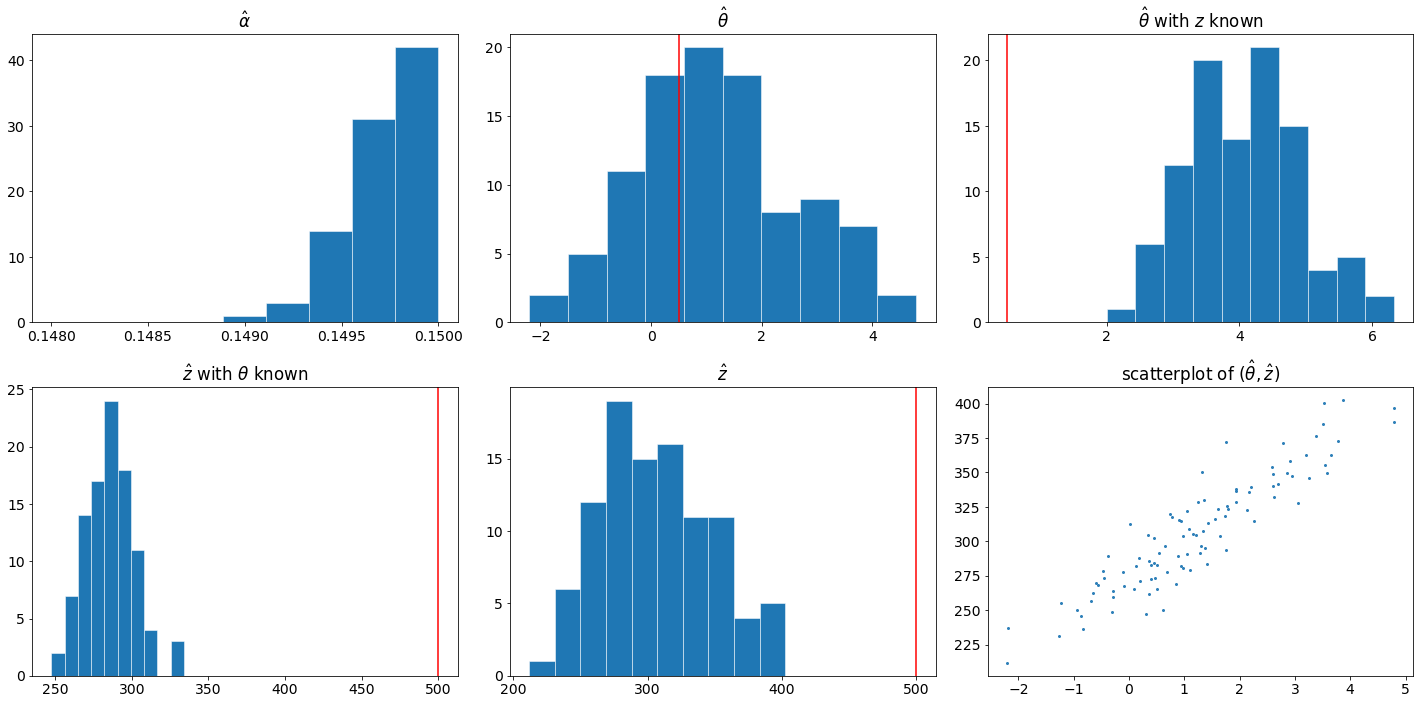

In [312]:
cdataft = cdataf.loc[(cdataf['theta']== theta) & (cdataf['type'] == typ)]
z = cdataft['z'].iloc[0]

plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.title(r'$\hat\alpha$')
plt.hist(cdataft['alpha_est'],  bins = np.linspace(0.148,0.15,10),color='C0', edgecolor='white', linewidth=0.5)
plt.locator_params(nbins=6)

plt.subplot(2,3,2)
plt.title(r'$\hat\theta$')
plt.hist(cdataft['theta_est'], color='C0', edgecolor='white', linewidth=0.5)
plt.axvline(x=theta, c='r')
plt.locator_params(nbins=6)
# plt.xticks([0, 1, 2])

plt.subplot(2,3,3)
plt.title(r'$\hat\theta$ with $z$ known')
plt.hist(cdataft['theta_known_z_est'], color='C0', edgecolor='white', linewidth=0.5)
plt.axvline(x=theta, c='r')
plt.locator_params(nbins=6)
# plt.xticks([0, 1, 2])

plt.subplot(2,3,4)
plt.title(r'$\hat z$ with $\theta$ known')
plt.hist(cdataft['z_known_theta_est'], color='C0', edgecolor='white', linewidth=0.5)
plt.axvline(x=z, c='r')
plt.locator_params(nbins=6)
# plt.xticks([400, 500, 600])


plt.subplot(2,3,5)
plt.title(r'$\hat z$')
plt.hist(cdataft['z_est'], color='C0', edgecolor='white', linewidth=0.5)
plt.axvline(x=z, c='r')
plt.locator_params(nbins=6)

plt.subplot(2,3,6)
plt.title(r'scatterplot of $(\hat\theta,\hat z)$')
plt.scatter(cdataft['theta_est'], cdataft['z_est'], color = 'C0', alpha=0.9, s=4)

plt.tight_layout()
plt.show()

#plt.savefig('estimation - type_' + str(typ) + '_theta_' + str(theta).replace('.','') + '.pdf')
plt.close()

In [164]:
print(r'$\hat\alpha$ ' + '{0:.5f}'.format(np.mean(cdataft['alpha_est'])) + ' (' + '{0:.5f}'.format(np.std(cdataft['alpha_est'])) + ')' )
print(r'$\hat\theta$ ' + '{0:.4f}'.format(np.mean(cdataft['theta_est'])) + ' (' + '{0:.4f}'.format(np.std(cdataft['theta_est'])) + ')')
print(r'$\hat\theta$ with $z$ known ' +'{0:.4f}'.format(np.mean(cdataft['theta_known_z_est'])) + ' (' + '{0:.4f}'.format(np.std(cdataft['theta_known_z_est'])) + ')' )
print(r'$\hat z$ ' +'{0:.2f}'.format(np.mean(cdataft['z_est'])) + ' (' + '{0:.2f}'.format(np.std(cdataft['z_est'])) + ')' )


$\hat\alpha$ 1.40552 (0.82092)
$\hat\theta$ 1.1442 (1.0133)
$\hat\theta$ with $z$ known 1.1715 (0.7238)
$\hat z$ 490.47 (65.53)


### Facets distribution - one plot

#### All type-theta combinations

In [104]:
for idx, df_s in cdataf.groupby(['theta','type']):
    theta = idx[0]
    typ = idx[1]
    cdataft = cdataf.loc[(cdataf['theta']== theta) & (cdataf['type'] == typ)].iloc[2]
    
    volumesA = listify(cdataft.tetra_volume)
    circumA = listify(cdataft.tetra_circum)
    tsurfA = listify(cdataft.tetra_surface)
    surfA = listify(cdataft.face_surf)
    lengthA = listify(cdataft.edge_length)
    degreeA = listify(cdataft.point_degree)

    plt.subplot(2,3,1)
    bins = np.linspace(0,0.002,40)
    plt.hist(volumesA, color='C0', edgecolor='white', linewidth=0.5)
    plt.xlabel("Volume")
    plt.axvline(x=np.mean(volumesA), c='r')
    #plt.ylabel("Density")
    plt.title('Cell volume')
    plt.locator_params(nbins=4)

    plt.subplot(2,3,2)
    bins = np.linspace(0,0.3,40)
    plt.hist(tsurfA, color='C0', edgecolor='white', linewidth=0.5)
    plt.xlabel("Surface")
    plt.axvline(x=np.mean(tsurfA), c='r')
    #plt.ylabel("Density")
    plt.title('Cell surface')
    plt.locator_params(nbins=4)

    plt.subplot(2,3,3)
    bins = np.linspace(0,0.3,40)
    plt.hist(circumA, color='C0', edgecolor='white', linewidth=0.5)
    plt.xlabel("Circumradius")
    plt.axvline(x=np.mean(circumA), c='r')
    #plt.ylabel("Density")
    plt.title('Cell circumradius')
    plt.locator_params(nbins=4)

    plt.subplot(2,3,4)
    bins_surf = np.linspace(0.0004,0.04,40)
    plt.hist(surfA, color='C0', edgecolor='white', linewidth=0.5)
    plt.xlabel("Surface")
    plt.axvline(x=np.mean(surfA), c='r')
    #plt.ylabel("Density")
    plt.title('Face surface')
    plt.locator_params(nbins=4)

    plt.subplot(2,3,5)
    bins_length = np.linspace(0.01,0.4,40)
    plt.hist(lengthA, color='C0', edgecolor='white', linewidth=0.5)
    plt.xlabel("Length")
    plt.axvline(x=np.mean(lengthA), c='r')
    #plt.ylabel("Density")
    plt.title('Edge length')
    plt.locator_params(nbins=6)

    plt.subplot(2,3,6)
    bins_deg = np.linspace(0,35,30)
    plt.hist(degreeA, color='C0', edgecolor='white', linewidth=0.5)
    plt.xlabel("Degree")
    plt.axvline(x=np.mean(degreeA), c='r')
    #plt.ylabel("Density")
    plt.title('Vertex degree')
    plt.locator_params(nbins=6)

    plt.tight_layout()
    # plt.show()

    plt.savefig('facets - type_' + str(typ) + '_theta_' + str(theta) + '.pdf')
    plt.close()

#### One theta

In [323]:
theta = 0.01
typ = 'D+'

In [ ]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(20,10))


cdataft = cdataf.loc[(cdataf['theta']== theta) & (cdataf['type'] == typ)].iloc[2]

volumesA = listify(cdataft.tetra_volume)
circumA = listify(cdataft.tetra_circum)
tsurfA = listify(cdataft.tetra_surface)
surfA = listify(cdataft.face_surf)
lengthA = listify(cdataft.edge_length)
degreeA = listify(cdataft.point_degree)


plt.subplot(2,3,1)
bins = np.linspace(0,0.002,40)
plt.hist(volumesA, color='C0', edgecolor='white', linewidth=0.5)
plt.xlabel("Volume")
plt.axvline(x=np.mean(volumesA), c='r')
#plt.ylabel("Density")
plt.title('Cell volume')
plt.locator_params(nbins=3)

plt.subplot(2,3,2)
bins = np.linspace(0,0.3,40)
plt.hist(tsurfA, color='C0', edgecolor='white', linewidth=0.5)
plt.xlabel("Surface")
plt.axvline(x=np.mean(tsurfA), c='r')
#plt.ylabel("Density")
plt.title('Cell surface')
plt.locator_params(nbins=4)

plt.subplot(2,3,3)
bins = np.linspace(0,0.3,40)
plt.hist(circumA, color='C0', edgecolor='white', linewidth=0.5)
plt.xlabel("Circumradius")
plt.axvline(x=np.mean(circumA), c='r')
#plt.ylabel("Density")
plt.title('Cell circumradius')
plt.locator_params(nbins=4)

plt.subplot(2,3,4)
bins_surf = np.linspace(0.0004,0.04,40)
plt.hist(surfA, color='C0', edgecolor='white', linewidth=0.5)
plt.xlabel("Surface")
plt.axvline(x=np.mean(surfA), c='r')
#plt.ylabel("Density")
plt.title('Face surface')
plt.locator_params(nbins=4)

plt.subplot(2,3,5)
bins_length = np.linspace(0.01,0.4,40)
plt.hist(lengthA, color='C0', edgecolor='white', linewidth=0.5)
plt.xlabel("Length")
plt.axvline(x=np.mean(lengthA), c='r')
#plt.ylabel("Density")
plt.title('Edge length')
plt.locator_params(nbins=4)

plt.subplot(2,3,6)
bins_deg = np.linspace(0,35,30)
plt.hist(degreeA, color='C0', edgecolor='white', linewidth=0.5)
plt.xlabel("Degree")
plt.axvline(x=np.mean(degreeA), c='r')
#plt.ylabel("Density")
plt.title('Vertex degree')
plt.locator_params(nbins=4)

plt.tight_layout()
plt.show()

# plt.savefig('facets - type_' + str(typ) + '_theta_' + str(theta) + '.pdf')
plt.close()

### Poisson comparison

In [327]:
theta = 0.01
type = 'D+'

In [334]:
intensity = cdata.z[cdata.theta==0.01].iloc[0]

In [343]:
## Poisson statistics
Evolume = 35/(24*math.pi**2 * intensity)
Eface = 0.597*(intensity**(-2/3))
Eedge = 1.237*(intensity**(-1/3))
Edegree = 15.535

In [356]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(20,10))


cdataft = cdataf.loc[(cdataf['theta']== theta) & (cdataf['type'] == typ)].iloc[4]

volumesA = listify(cdataft.tetra_volume)
circumA = listify(cdataft.tetra_circum)
tsurfA = listify(cdataft.tetra_surface)
surfA = listify(cdataft.face_surf)
lengthA = listify(cdataft.edge_length)
degreeA = listify(cdataft.point_degree)


plt.subplot(2,2,1)
bins = np.linspace(0,0.002,40)
plt.hist(volumesA, color='C0', edgecolor='white', linewidth=0.5)
plt.xlabel("Volume")
plt.axvline(x=np.mean(volumesA), c='r', linewidth=3)
plt.axvline(x=Evolume,c='C6', linewidth=3)
#plt.ylabel("Density")
plt.title('Cell volume')
plt.locator_params(nbins=3)



plt.subplot(2,2,2)
bins_surf = np.linspace(0.0004,0.04,40)
plt.hist(surfA, color='C0', edgecolor='white', linewidth=0.5)
plt.xlabel("Surface")
plt.axvline(x=np.mean(surfA), c='r', linewidth=3)
plt.axvline(x=Eface,c='C6', linewidth=3)
#plt.ylabel("Density")
plt.title('Face surface')
plt.locator_params(nbins=4)

plt.subplot(2,2,3)
bins_length = np.linspace(0.01,0.4,40)
plt.hist(lengthA, color='C0', edgecolor='white', linewidth=0.5)
plt.xlabel("Length")
plt.axvline(x=np.mean(lengthA), c='r', linewidth=3)
plt.axvline(x=Eedge,c='C6', linewidth=3)
#plt.ylabel("Density")
plt.title('Edge length')
plt.locator_params(nbins=4)

plt.subplot(2,2,4)
bins_deg = np.linspace(0,35,30)
plt.hist(degreeA, color='C0', edgecolor='white', linewidth=0.5)
plt.xlabel("Degree")
plt.axvline(x=np.mean(degreeA), c='r', linewidth=3)
plt.axvline(x=Edegree,c='C6', linewidth=3)
#plt.ylabel("Density")
plt.title('Vertex degree')
plt.locator_params(nbins=4)

plt.tight_layout()
# plt.show()

plt.savefig('facets - type_' + str(typ) + '_theta_' + str(theta) + '.pdf')
plt.close()

### Facets distribution - Comparison plot

By $\theta$

In [185]:
typ = 'L+'
thetaA = 1
thetaB = -1

labelA = str(thetaA)
labelB = str(thetaB)

In [186]:
cdataA = cdataf.loc[(cdataf['type'] == typ) & (cdataf['theta']==thetaA),].iloc[1]
cdataB = cdataf.loc[(cdataf['type'] == typ) & (cdataf['theta']==thetaB),].iloc[1]


#### By type

In [179]:
theta = 1
typA = 'L+'
typB = 'D+'

labelA = str(typA)
labelB = str(typB)

In [180]:
cdataA = cdataf.loc[(cdataf['type'] == typA) & (cdataf['theta']==theta),].iloc[0]
cdataB = cdataf.loc[(cdataf['type'] == typB) & (cdataf['theta']==theta),].iloc[0]


---

In [187]:
volumesA = listify(cdataA.tetra_volume)
volumesB = listify(cdataB.tetra_volume)

circumA = listify(cdataA.tetra_circum)
circumB = listify(cdataB.tetra_circum)

tsurfA = listify(cdataA.tetra_surface)
tsurfB = listify(cdataB.tetra_surface)

surfA = listify(cdataA.face_surf)
surfB = listify(cdataB.face_surf)

lengthA = listify(cdataA.edge_length)
lengthB = listify(cdataB.edge_length)

degreeA = listify(cdataA.point_degree)
degreeB = listify(cdataB.point_degree)

### Plot

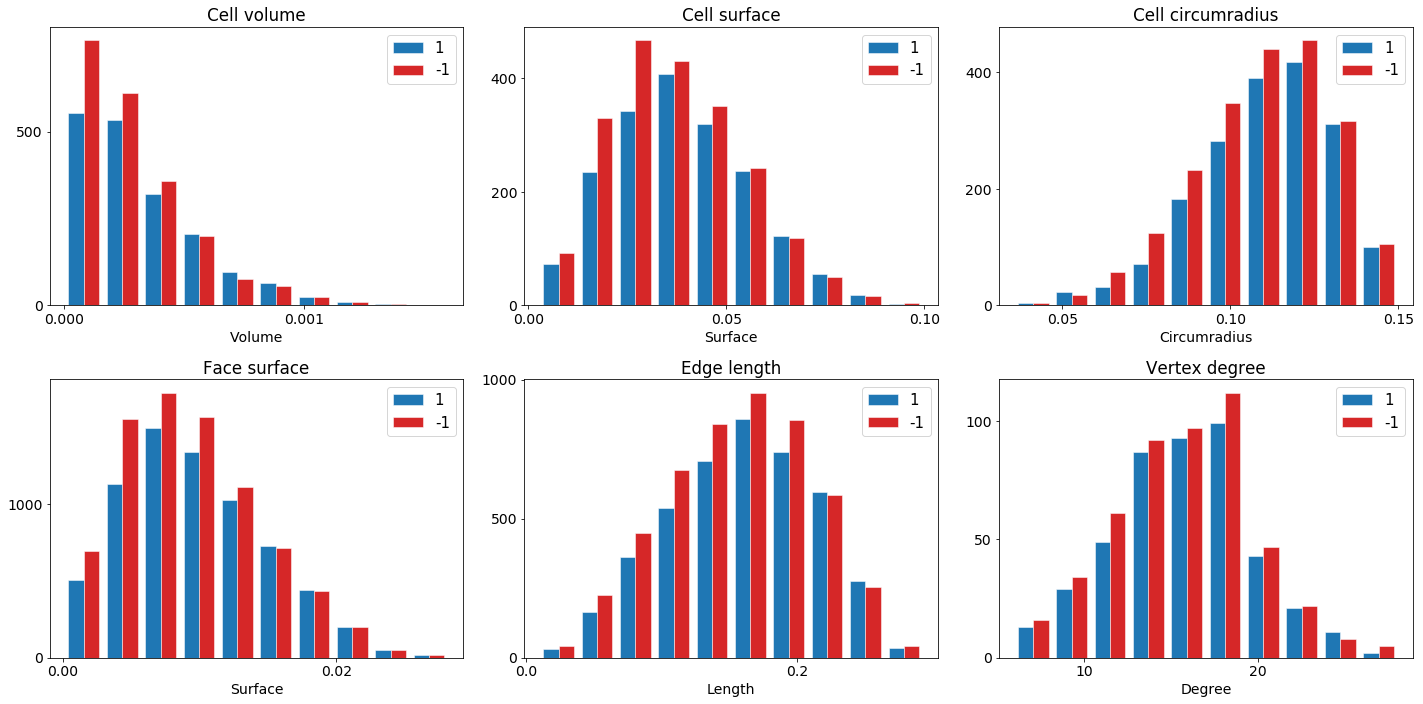

In [190]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(20,10))


plt.subplot(2,3,1)

plt.hist([volumesA,volumesB],  label=[labelA, labelB], color=['C0','C3'], edgecolor='white', linewidth=0.5)
plt.legend(loc='upper right',prop={'size': 15})
plt.xlabel("Volume")
#plt.ylabel("Density")
plt.title('Cell volume')
plt.locator_params(nbins=3)

plt.subplot(2,3,2)
bins_tsurf = np.linspace(0,0.1,10)
plt.hist([tsurfA,tsurfB], label=[labelA,labelB], color=['C0','C3'], edgecolor='white', linewidth=0.5)
plt.legend(loc='upper right',prop={'size': 15})
plt.xlabel("Surface")
#plt.ylabel("Density")
plt.title('Cell surface')
plt.locator_params(nbins=3)

plt.subplot(2,3,3)
bins_circum = np.linspace(0.03,0.2,10)
plt.hist([circumA,circumB], label=[labelA,labelB], color=['C0','C3'], edgecolor='white', linewidth=0.5)
plt.legend(loc='upper right',prop={'size': 15})
plt.xlabel("Circumradius")
#plt.ylabel("Density")
plt.title('Cell circumradius')
plt.locator_params(nbins=3)


plt.subplot(2,3,4)
bins_surf = np.linspace(0.0003,0.03,10)
plt.hist([surfA,surfB], label=[labelA,labelB], color=['C0','C3'], edgecolor='white', linewidth=0.5)
plt.legend(loc='upper right',prop={'size': 15})
plt.xlabel("Surface")
#plt.ylabel("Density")
plt.title('Face surface')
plt.locator_params(nbins=3)


plt.subplot(2,3,5)
bins_length = np.linspace(0.01,0.35,10)
plt.hist([lengthA,lengthB], label=[labelA, labelB], color=['C0','C3'], edgecolor='white', linewidth=0.5)
plt.legend(loc='upper right',prop={'size': 15})
plt.xlabel("Length")
#plt.ylabel("Density")
plt.title('Edge length')
plt.locator_params(nbins=3)

plt.subplot(2,3,6)
bins_deg = np.linspace(0,35,10)
plt.hist([degreeA,degreeB], label=[labelA, labelB], color=['C0','C3'], edgecolor='white', linewidth=0.5)
plt.legend(loc='upper right',prop={'size': 15})
plt.xlabel("Degree")
#plt.ylabel("Density")
plt.title('Vertex degree')
plt.locator_params(nbins=3)

plt.tight_layout()
plt.show()

# plt.savefig('facets_' + labelA + '_' + labelB + '.pdf')
plt.close()

### Summary stats table prep

#### All types+thetas

In [224]:
theta = 1
results = pd.DataFrame(columns=['model', 'theta', 'Cell volume','Cell circumradius','Cell surface', 'Face surface', 'Edge length', 'Vertex degree', 'Cell count', 'Vertex count'])

for idx,df_s in cdataf.groupby(['theta','type']):
    print(idx)
    theta = idx[0]
    typA = idx[1]
    cdatasub = cdataf.loc[(cdataf['type'] == typA) & (cdataf['theta']==theta),]
    for i in range(len(cdatasub)):  
        cdataA = cdatasub.iloc[i]

        volumesA = listify(cdataA.tetra_volume)
        circumA = listify(cdataA.tetra_circum)
        tsurfA = listify(cdataA.tetra_surface)
        surfA = listify(cdataA.face_surf)
        lengthA = listify(cdataA.edge_length)
        degreeA = listify(cdataA.point_degree)


        facet_data = [volumesA,circumA,tsurfA,surfA,lengthA,degreeA]

        row = [typA,theta] + [np.mean(x) for x in facet_data] + [len(volumesA), len(degreeA)]
        results = results.append(pd.Series(row,index=results.columns), ignore_index=True)

(-1.0, 'D+')
(-1.0, 'L+')
(-0.5, 'D+')
(-0.5, 'L+')
(0.5, 'D+')
(0.5, 'L+')
(1.0, 'D+')
(1.0, 'L+')


In [225]:
results_grouped = results.groupby(['model','theta']).agg(['mean','std'])
results_grouped

Cell volume           Cell circumradius           Cell surface  \
                   mean       std              mean       std         mean   
model theta                                                                  
D+    -1.0     0.000233  0.000009          0.101070  0.001247     0.032249   
      -0.5     0.000238  0.000011          0.101467  0.001599     0.032648   
       0.5     0.000252  0.000011          0.102802  0.001390     0.033706   
       1.0     0.000261  0.000010          0.103649  0.001269     0.034444   
L+    -1.0     0.000296  0.000012          0.108983  0.001330     0.037321   
      -0.5     0.000303  0.000011          0.109552  0.001176     0.037829   
       0.5     0.000317  0.000015          0.110505  0.001459     0.038833   
       1.0     0.000326  0.000014          0.111030  0.001323     0.039429   

                      Face surface           Edge length            \
                  std         mean       std        mean       std   
model theta                                                          
D+    -1.0   0.000789     0.008097  0.000197    0.145320  0.001722   
      -0.5   0.001039     0.008194  0.000261    0.146051  0.002414   
       0.5   0.000919     0.008460  0.000229    0.148092  0.001986   
       1.0   0.000870     0.008643  0.000218    0.149539  0.001835   
L+    -1.0   0.001021     0.009360  0.000255    0.156474  0.002014   
      -0.5   0.000910     0.009488  0.000228    0.157405  0.001935   
       0.5   0.001222     0.009742  0.000305    0.159326  0.002366   
       1.0   0.001051     0.009886  0.000263    0.160274  0.001969   

            Vertex degree           Cell count             Vertex count  \
                     mean       std       mean         std         mean   
model theta                                                               
D+    -1.0      15.440719  0.093905    2761.27  108.143176       639.62   
      -0.5      15.424654  0.091950    2685.69  119.929415       626.21   
       0.5      15.417522  0.091065    2509.03  103.308253       595.24   
       1.0      15.414493  0.083362    2416.40  100.888377       577.32   
L+    -1.0      15.537621  0.087798    2082.93   81.362173       496.70   
      -0.5      15.538376  0.102025    2022.42   92.715180       484.42   
       0.5      15.574430  0.105489    1909.35   84.825594       460.83   
       1.0      15.571132  0.105244    1855.28   86.704081       451.88   

                        
                   std  
model theta             
D+    -1.0   19.959950  
      -0.5   22.531368  
       0.5   18.976924  
       1.0   19.278333  
L+    -1.0   16.514762  
      -0.5   17.982135  
       0.5   16.132065  
       1.0   16.312776

In [291]:
results_grouped.loc[('D+',0.5),('Cell volume','mean')]

0.00025152265587998819

In [304]:
print(r"""\begin{table*}\centering
\ra{1.3}
\begin{tabular}{lrllllllll}\toprule
&& \multicolumn{4}{c}{Cell} & \multicolumn{1}{c}{Face} & \multicolumn{1}{c}{Edge} & \multicolumn{2}{c}{Vertex} \\ 
\cmidrule(lr){3-6} \cmidrule(lr){7-7} \cmidrule(lr){8-8} \cmidrule(lr){9-10}
& Theta &  Count & Volume & Circumradius & Surface & Surface & Length & Count & Degree \\
\midrule""")


for typ,df_ty in results_grouped.groupby(level=0):
    print(r'\texttt{' + typ + r'} \\')
    for theta,df_th in df_ty.groupby(level=1):
        print(' & ' + str(theta) 
              + ' &  {0:.1f}'.format(results_grouped.loc[(typ,theta),('Cell count', 'mean')])
              + ' &  {0:.5f}'.format(results_grouped.loc[(typ,theta),('Cell volume', 'mean')])
              + ' &  {0:.4f}'.format(results_grouped.loc[(typ,theta),('Cell circumradius', 'mean')])
              + ' &  {0:.4f}'.format(results_grouped.loc[(typ,theta),('Cell surface', 'mean')])
              + ' &  {0:.4f}'.format(results_grouped.loc[(typ,theta),('Face surface', 'mean')])
              + ' &  {0:.4f}'.format(results_grouped.loc[(typ,theta),('Edge length', 'mean')])
              + ' &  {0:.1f}'.format(results_grouped.loc[(typ,theta),('Vertex count', 'mean')])
              + ' &  {0:.1f}'.format(results_grouped.loc[(typ,theta),('Vertex degree', 'mean')]) 
              + r' \\')
        print(' & ' 
              + '&  ({0:.1f}'.format(results_grouped.loc[(typ,theta),('Cell count', 'std')]) 
              + ') &  ({0:.5f}'.format(results_grouped.loc[(typ,theta),('Cell volume', 'std')])
              + ') &  ({0:.4f}'.format(results_grouped.loc[(typ,theta),('Cell circumradius', 'std')])
              + ') &  ({0:.4f}'.format(results_grouped.loc[(typ,theta),('Cell surface', 'std')])
              + ') &  ({0:.4f}'.format(results_grouped.loc[(typ,theta),('Face surface', 'std')])
              + ') &  ({0:.4f}'.format(results_grouped.loc[(typ,theta),('Edge length', 'std')])
              + ') &  ({0:.1f}'.format(results_grouped.loc[(typ,theta),('Vertex count', 'std')])
              + ') &  ({0:.1f}'.format(results_grouped.loc[(typ,theta),('Vertex degree', 'std')]) 
              + r') \\')
        
        
        
        
print(r"""\bottomrule
\end{tabular}
\caption{Facet statistics}
\end{table*}""")

\begin{table*}\centering
\ra{1.3}
\begin{tabular}{lrllllllll}\toprule
&& \multicolumn{4}{c}{Cell} & \multicolumn{1}{c}{Face} & \multicolumn{1}{c}{Edge} & \multicolumn{2}{c}{Vertex} \\ 
\cmidrule(lr){3-6} \cmidrule(lr){7-7} \cmidrule(lr){8-8} \cmidrule(lr){9-10}
& Theta &  Count & Volume & Circumradius & Surface & Surface & Length & Count & Degree \\
\midrule
\texttt{D+} \\
 & -1.0 &  2761.3 &  0.00023 &  0.1011 &  0.0322 &  0.0081 &  0.1453 &  639.6 &  15.4 \\
 & &  (108.1) &  (0.00001) &  (0.0012) &  (0.0008) &  (0.0002) &  (0.0017) &  (20.0) &  (0.1) \\
 & -0.5 &  2685.7 &  0.00024 &  0.1015 &  0.0326 &  0.0082 &  0.1461 &  626.2 &  15.4 \\
 & &  (119.9) &  (0.00001) &  (0.0016) &  (0.0010) &  (0.0003) &  (0.0024) &  (22.5) &  (0.1) \\
 & 0.5 &  2509.0 &  0.00025 &  0.1028 &  0.0337 &  0.0085 &  0.1481 &  595.2 &  15.4 \\
 & &  (103.3) &  (0.00001) &  (0.0014) &  (0.0009) &  (0.0002) &  (0.0020) &  (19.0) &  (0.1) \\
 & 1.0 &  2416.4 &  0.00026 &  0.1036 &  0.0344 &  0.0086 &  0.1495

In [381]:
theta = 1
results = pd.DataFrame(columns=['model', 'stat', 'Cell volume','Cell circumradius','Cell surface', 'Face surface', 'Edge length', 'Vertex degree'])

for typA in cdata.type.unique():
    cdataA = cdataf.loc[(cdataf['type'] == typA) & (cdataf['theta']==theta),].iloc[0]

    volumesA = listify(cdataA.tetra_volume)
    circumA = listify(cdataA.tetra_circum)
    tsurfA = listify(cdataA.tetra_surface)
    surfA = listify(cdataA.face_surf)
    lengthA = listify(cdataA.edge_length)
    degreeA = listify(cdataA.point_degree)


    facet_data = [volumesA,circumA,tsurfA,surfA,lengthA,degreeA]

    row = [typA,'mean'] + [np.mean(x) for x in facet_data]
    results = results.append(pd.Series(row,index=results.columns), ignore_index=True)

    row = [typA,'std'] + [np.std(x) for x in facet_data]
    results = results.append(pd.Series(row,index=results.columns), ignore_index = True)

##### Old

In [130]:
print(r'Type & \theta = ' + str(thetaA) + r' & \theta = ' + str(thetaB) + r' \\')
print('Cell volume & ' + '{0:.5f}'.format(np.mean(volumesA)) + ' (' + '{0:.5f}'.format(np.std(volumesA)) + ')' + ' & ' +  '{0:.5f}'.format(np.mean(volumesB)) + ' (' + '{0:.5f}'.format(np.std(volumesB)) + ') \\\\')
print('Cell circumradius & ' + '{0:.4f}'.format(np.mean(circumA)) + ' (' + '{0:.4f}'.format(np.std(circumA)) + ')' +' & ' + '{0:.4f}'.format(np.mean(circumB)) + ' (' + '{0:.4f}'.format(np.std(circumB)) + ') \\\\')
print('Cell surface & ' + '{0:.4f}'.format(np.mean(tsurfA)) + ' (' + '{0:.4f}'.format(np.std(tsurfA)) + ')' +' & ' + '{0:.4f}'.format(np.mean(tsurfB)) + ' (' + '{0:.4f}'.format(np.std(tsurfB)) + ') \\\\')
print('Face surface & ' + '{0:.4f}'.format(np.mean(surfA)) + ' (' + '{0:.4f}'.format(np.std(surfA)) + ')' +' & ' + '{0:.4f}'.format(np.mean(surfB)) + ' (' + '{0:.4f}'.format(np.std(surfB)) + ') \\\\')
print('Edge length & ' + '{0:.2f}'.format(np.mean(lengthA)) + ' (' + '{0:.2f}'.format(np.std(lengthA)) + ')' + ' & ' + '{0:.2f}'.format(np.mean(lengthB)) + ' (' + '{0:.2f}'.format(np.std(lengthB)) + ') \\\\')
print('Vertex degree & ' +  '{0:.2f}'.format(np.mean(degreeA)) + ' (' + '{0:.2f}'.format(np.std(degreeA)) + ')' + ' & ' + '{0:.2f}'.format(np.mean(degreeB)) + ' (' + '{0:.2f}'.format(np.std(degreeB)) + ') \\\\')


Type & \theta = 0.5 & \theta = 1 \\
Cell volume & 0.00024 (0.00021) & 0.00027 (0.00024) \\
Cell circumradius & 0.1016 (0.0217) & 0.1037 (0.0232) \\
Cell surface & 0.0328 (0.0163) & 0.0347 (0.0183) \\
Face surface & 0.0082 (0.0048) & 0.0087 (0.0053) \\
Edge length & 0.15 (0.05) & 0.15 (0.06) \\
Vertex degree & 15.37 (3.46) & 15.51 (3.56) \\


### Single facet statistic

In [108]:
bins = np.linspace(0,0.002,40)
plt.hist([volumesA,volumesB],  label=[labelA,labelB])
plt.legend(loc='upper right',prop={'size': 6})
plt.xlabel("Volume")
#plt.ylabel("Density")
plt.title('Cell volume')
plt.locator_params(nbins=4)

In [109]:
bins_tsurf = np.linspace(0,0.2,40)
plt.hist([tsurfA,tsurfB],bins_tsurf, label=[labelA,labelB])
plt.legend(loc='upper right',prop={'size': 6})
plt.xlabel("Surface")
#plt.ylabel("Density")
plt.title('Cell Surface')
plt.locator_params(nbins=4)

In [110]:
bins_circum = np.linspace(0.03,0.2,40)
plt.hist([circumA,circumB],bins_circum, label=[labelA,labelB])
plt.legend(loc='upper right',prop={'size': 6})
plt.xlabel("Circumradius")
#plt.ylabel("Density")
plt.title('Cell circumradius')
plt.locator_params(nbins=4)

In [111]:
bins_surf = np.linspace(0.0004,0.04,40)
plt.hist([surfA,surfB],bins_surf, label=[labelA,labelB])
plt.legend(loc='upper right',prop={'size': 6})
plt.xlabel("Surface")
#plt.ylabel("Density")
plt.title('Face surface')
plt.locator_params(nbins=4)

In [112]:
bins_length = np.linspace(0.01,0.4,40)
plt.hist([lengthA,lengthB],bins_length, label=[labelA, labelB])
plt.legend(loc='upper right',prop={'size': 6})
plt.xlabel("Length")
#plt.ylabel("Density")
plt.title('Edge length')
plt.locator_params(nbins=6)

In [107]:
bins_deg = np.linspace(0,35,30)
plt.hist([degreeA,degreeB],bins_deg, label=[labelA, labelB])
plt.legend(loc='upper right',prop={'size': 6})
plt.xlabel("Degree")
#plt.ylabel("Density")
plt.title('Vertex degree')
plt.locator_params(nbins=6)

### Multiple theta estimate plots

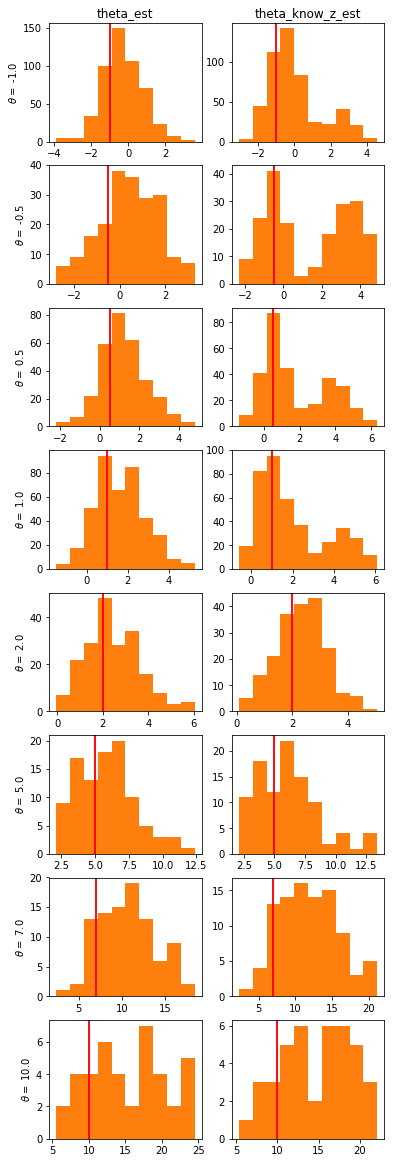

In [110]:
groupnum = len(cdataf.groupby(['theta']))
thetas = cdataf.groupby(['theta'])['theta_est','theta_known_z_est'].agg(['mean','std']).index

for i, theta in enumerate(thetas):
    plt.subplot(groupnum,2,2*i+1)
    plt.ylabel(r'$\theta = $ ' + str(theta))
    plt.hist(cdataf.loc[cdataf['theta'] == thetas[i], 'theta_est'])
    plt.axvline(x=thetas[i], c='r')
    if (i==0):
        plt.title('theta_est')

    plt.subplot(groupnum,2,2*i+2)
    plt.hist(cdataf.loc[cdataf['theta'] == thetas[i], 'theta_known_z_est'])
    plt.axvline(x=thetas[i], c='r')
    if (i==0):
        plt.title('theta_know_z_est')
    
# plt.tight_layout(pad = 2, w_pad = 2, h_pad = 5)
plt.subplots_adjust(top=4)

plt.show()

# plt.savefig('estimates_mult.pdf')

---

# Diagnostic plots

In [50]:
log = pd.read_csv('files/log_3_6_20190101_14_16_26_37566.csv', sep=',')

### Accept + move type statistics

In [51]:
log['accept'].value_counts()

0.0    1730786
1.0    1211278
Name: accept, dtype: int64

In [52]:
log['type'].value_counts()

M    1000520
B    1000196
D     999284
Name: type, dtype: int64

In [58]:
log.groupby('accept')['type'].value_counts()

accept  type
0.0     M       659622
        D       552666
        B       518498
1.0     D       446618
        B       446369
        M       318291
Name: type, dtype: int64

### Convergence

In [152]:
log['time'] = log['time'].replace(math.nan,'',regex=True)
log['time'] = pd.to_numeric(log['time'])

In [153]:
block_length = 10000
groupby_blocks = np.repeat(range(int(len(log)/block_length)),block_length)
groupby_blocks = np.array([0] + list(groupby_blocks+1))[0:-1]

In [154]:
groupedlog = log.groupby([groupby_blocks, 'type'])['accept'].sum().reset_index()

In [155]:
groupedmeanlog = log.groupby([groupby_blocks])['energy','no_act_vrt','time'].mean().reset_index()

In [163]:
plt.rcParams.update({'font.size': 11})

plt.figure(figsize=(20,10))


plt.subplot(5,1,1)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Energy')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
# plt.ylim(240,250)
plt.locator_params(axis = 'y', nbins=3)
groupedmeanlog['energy'].plot()


plt.subplot(5,1,2)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Number of vertices')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.ylim(400,550)
plt.locator_params(axis = 'y', nbins=2)
groupedmeanlog['no_act_vrt'].plot()

# plt.subplot(5,1,3)
# plt.title('Time taken')
# plt.ylim(0.0028,0.0032)
# groupedmeanlog['time'].plot()

plt.subplot(5,1,3)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Accepted births')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.locator_params(axis = 'y', nbins=3)
groupedlog[groupedlog['type'] == 'B']['accept'].plot()

plt.subplot(5,1,4)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Accepted deaths')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.locator_params(axis = 'y', nbins=3)
plt.ylim(1300,1600)
groupedlog[groupedlog['type'] == 'D']['accept'].plot()

plt.subplot(5,1,5)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Accepted moves')

plt.locator_params(axis = 'y', nbins=3)
plt.ylim(850,1200)
plt.xlabel("Iterations (*10,000)")
groupedlog[groupedlog['type'] == 'M']['accept'].reset_index(drop=True).plot()


plt.subplots_adjust(hspace=0.8)
# plt.tight_layout()
# plt.show()

plt.savefig('convergence.pdf')
plt.close()

### Checking if the energy does not move by itself

In [89]:
lognona = log[~log.isnull().any(axis=1)]
logshift = lognona.assign(shiftenergy = lognona['energy'].shift(-1))

In [90]:
logshift[(logshift['shiftenergy'] - logshift['energy'] != 0) & (logshift['accept'] != 1)]

,step_no,type,pt,pt_mv,energy,energy_after,b,ratio,accept,no_vrt,no_act_vrt,time,shiftenergy
1999999,2000000,B,0.260079 0.576914 0.170576 0.0041291,,145.211,-1.0,0.762074,0.511364,0.0,6142.0,871.0,0.002197,NaN


## Parsing Cell data from SLURM logs

In [483]:
def extract_data(filename):
    lines = []
    with open(filename,  'r') as slurm:
        for line in slurm:
            lines += [line]
            
    numbers_unflat = [re.findall("\d+\.\d+|\d+", line) for line in lines]
    data = []
    if len(numbers_unflat) == 12:
        numbers = [float(number) for sublist in numbers_unflat for number in sublist]
        data = [filename] + [numbers[i] for i in [3,4,5,6,7,8,11,12,13,14,15,16,18,19,20]]

    return(data)

In [484]:
columns = ['filename','theta','epsilon','alpha','z','max_weight', 'iterations','pts','pts_active','pts_removable','min_edge_est','epsilon_est','alpha_est','theta_est','z_est','theta_z_known_est']

df = pd.DataFrame(columns=columns)

In [485]:
data = []
success = 0
total = 0

for filename in os.listdir('slurmlogs'):
    total += 1
    slurm_parsed = extract_data('slurmlogs/' + filename) 
    if len(slurm_parsed) == 16:
        data += [slurm_parsed]
        success += 1
    
print('Success rate:', success, 'out of', total,'. (',success/total, ')')

Success rate: 303 out of 303 . ( 1.0 )
